# Imbalanced Datasets (Breast Cancer Dataset)

In [6]:
#importing all required libraries
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
#DATASET 01 
#step 01 loading data  of  Wholesale customers data.csv


##  Loading Breast Cancer Dataset From UCI using pandas

In [7]:
df_breast_cancer = pd.read_csv ('breast-cancer.csv', delimiter=",")
df_breast_cancer

,recurrence-events,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Unnamed: 10
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no,NaN
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no,NaN
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no,NaN
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no,NaN
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no,NaN
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,NaN
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no,NaN
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no,NaN


* in this dataset i have categorical, numerical and range data columns. lets identify each columns dataype in next step

# Checking Dataset for datatypes and cleaning operations

In [9]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   recurrence-events  286 non-null    object 
 1   age                286 non-null    object 
 2   menopause          286 non-null    object 
 3   tumor-size         286 non-null    object 
 4   inv-nodes          286 non-null    object 
 5   node-caps          286 non-null    object 
 6   deg-malig          286 non-null    int64  
 7   breast             286 non-null    object 
 8   breast-quad        286 non-null    object 
 9   irradiat           286 non-null    object 
 10  Unnamed: 10        0 non-null      float64
dtypes: float64(1), int64(1), object(9)
memory usage: 24.7+ KB


* I have three types of datatype In this data set and one extra columns of float64 which can is shown in above results so i will drop it in next step 

### Dropping Null column from the dataset

In [40]:
# df_breast_cancer.drop(df_breast_cancer.columns[10],axis=1,inplace=True)

# pd.set_option('display.max_rows', df_breast_cancer.shape[0]+1)
df_breast_cancer.info()
# print(df_breast_cancer) # now i will verify the dropping of column and display all rows for irrelevent data in columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   recurrence-events  286 non-null    object
 1   age                286 non-null    object
 2   menopause          286 non-null    object
 3   tumor-size         286 non-null    object
 4   inv-nodes          286 non-null    object
 5   node-caps          286 non-null    object
 6   deg-malig          286 non-null    int64 
 7   breast             286 non-null    object
 8   breast-quad        286 non-null    object
 9   irradiat           286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


* So, in above exploaration of all rows of daset i have no null columns

## Split data into test and train datasets

In [41]:
# Create separate training and test sets. we'll use the training set for steps 3--6
train_set, test_set = train_test_split(df_breast_cancer, test_size=0.2, random_state=23)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(train_set), len(test_set))

228 58


In [42]:
# Let's make a copy of the training set to ensure we don't mess things up
df_train = train_set.copy()

##  Now i will transform Categorical columns   

We have tow type of columns in this dataset categorical and numerical

In [54]:
features=['deg-malig','recurrence-events','age','menopause','tumor-size','inv-nodes','node-caps','breast','breast-quad','irradiat']

num_features = ['deg-malig']
cat_features=['recurrence-events','age','menopause','tumor-size','inv-nodes','node-caps','breast','breast-quad','irradiat']

# Most algorithms cannot work with missing values. Three main ways to deal with them:
# 1. Drop rows
# 2. Drop features with NaNs
# 3. Fill missing values
# As we have very few missing values, let's drop the rows
print("Number of rows before dropping NaNs: %d" % len(df_train))
df_train = df_train.dropna()
print("Number of rows after dropping NaNs: %d" % len(df_train))
X_df = df_train[features].copy()

Number of rows before dropping NaNs: 228
Number of rows after dropping NaNs: 228


In [51]:
# We previously observed that some of the features were categorical. 
# Two main ways to deal with these: OrdinalEncoder() or OneHotEncoding()

# Let's use OneHotEncoding for the categories ('Category', 'Paid', 'Type')
# As we will later want to transform the test set, let's follow good practice and create a custom transformer for a sklearn pipeline

# This is an example of how it would be done. Since this is a very simple transformation, there's a better way of doing it
# using ColumnTransformer. We show it below

class OneHotEncoderCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, cat_features):
        self.cat_features = cat_features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cat_features)



In [67]:

encoder = OneHotEncoderCategoricalFeatures(cat_features)
X_oho = encoder.transform(X_df)
Cleaned_trained_data=X_oho
Cleaned_trained_data

,deg-malig,recurrence-events_no-recurrence-events,recurrence-events_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,...,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
16,2,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
51,2,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
120,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
63,2,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
204,2,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
168,2,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
260,2,0,1,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,1,0
58,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
55,1,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,1,0
141,2,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


### Now checking the Imbalance percentage of data and then Imbalance according to the equired Percentage

In [136]:
no_recurrence=Cleaned_trained_data['recurrence-events_recurrence-events'].value_counts() # percentage=156/288 = 75% and 25 %, this dataset is 25% 75% imbalance i will
no_recurrence #balance this dataset and then i will imbalced it according to the required percentages

0    156
1     72
Name: recurrence-events_recurrence-events, dtype: int64

In [173]:

from sklearn.utils import resample

recurrence_event = Cleaned_trained_data[Cleaned_trained_data["recurrence-events_recurrence-events"] == 1]
no_recurrence_event  = Cleaned_trained_data[Cleaned_trained_data["recurrence-events_recurrence-events"] == 0]
count_no_recurrence=no_recurrence_event.count()
# print(recurrence_event.count(0))
# print(no_recurrence_event.count())

no_recurrence_event_downsample = resample(no_recurrence_event,
             replace=True,
             n_samples=len(recurrence_event),
             random_state=42)

print("no_recurrence_event class")
print(no_recurrence_event_downsample.shape)
print("recurrence_event class")
print(recurrence_event.shape) 
                                                            # now i have balanced the datset by downsampling the no,recurrence class with 

no_recurrence_event class
(72, 43)
recurrence_event class
(72, 43)


## Now let's i will do statistical analysis Cleaned Train Data

So, In the above visualization i can clearly observe that many of these features are categorical

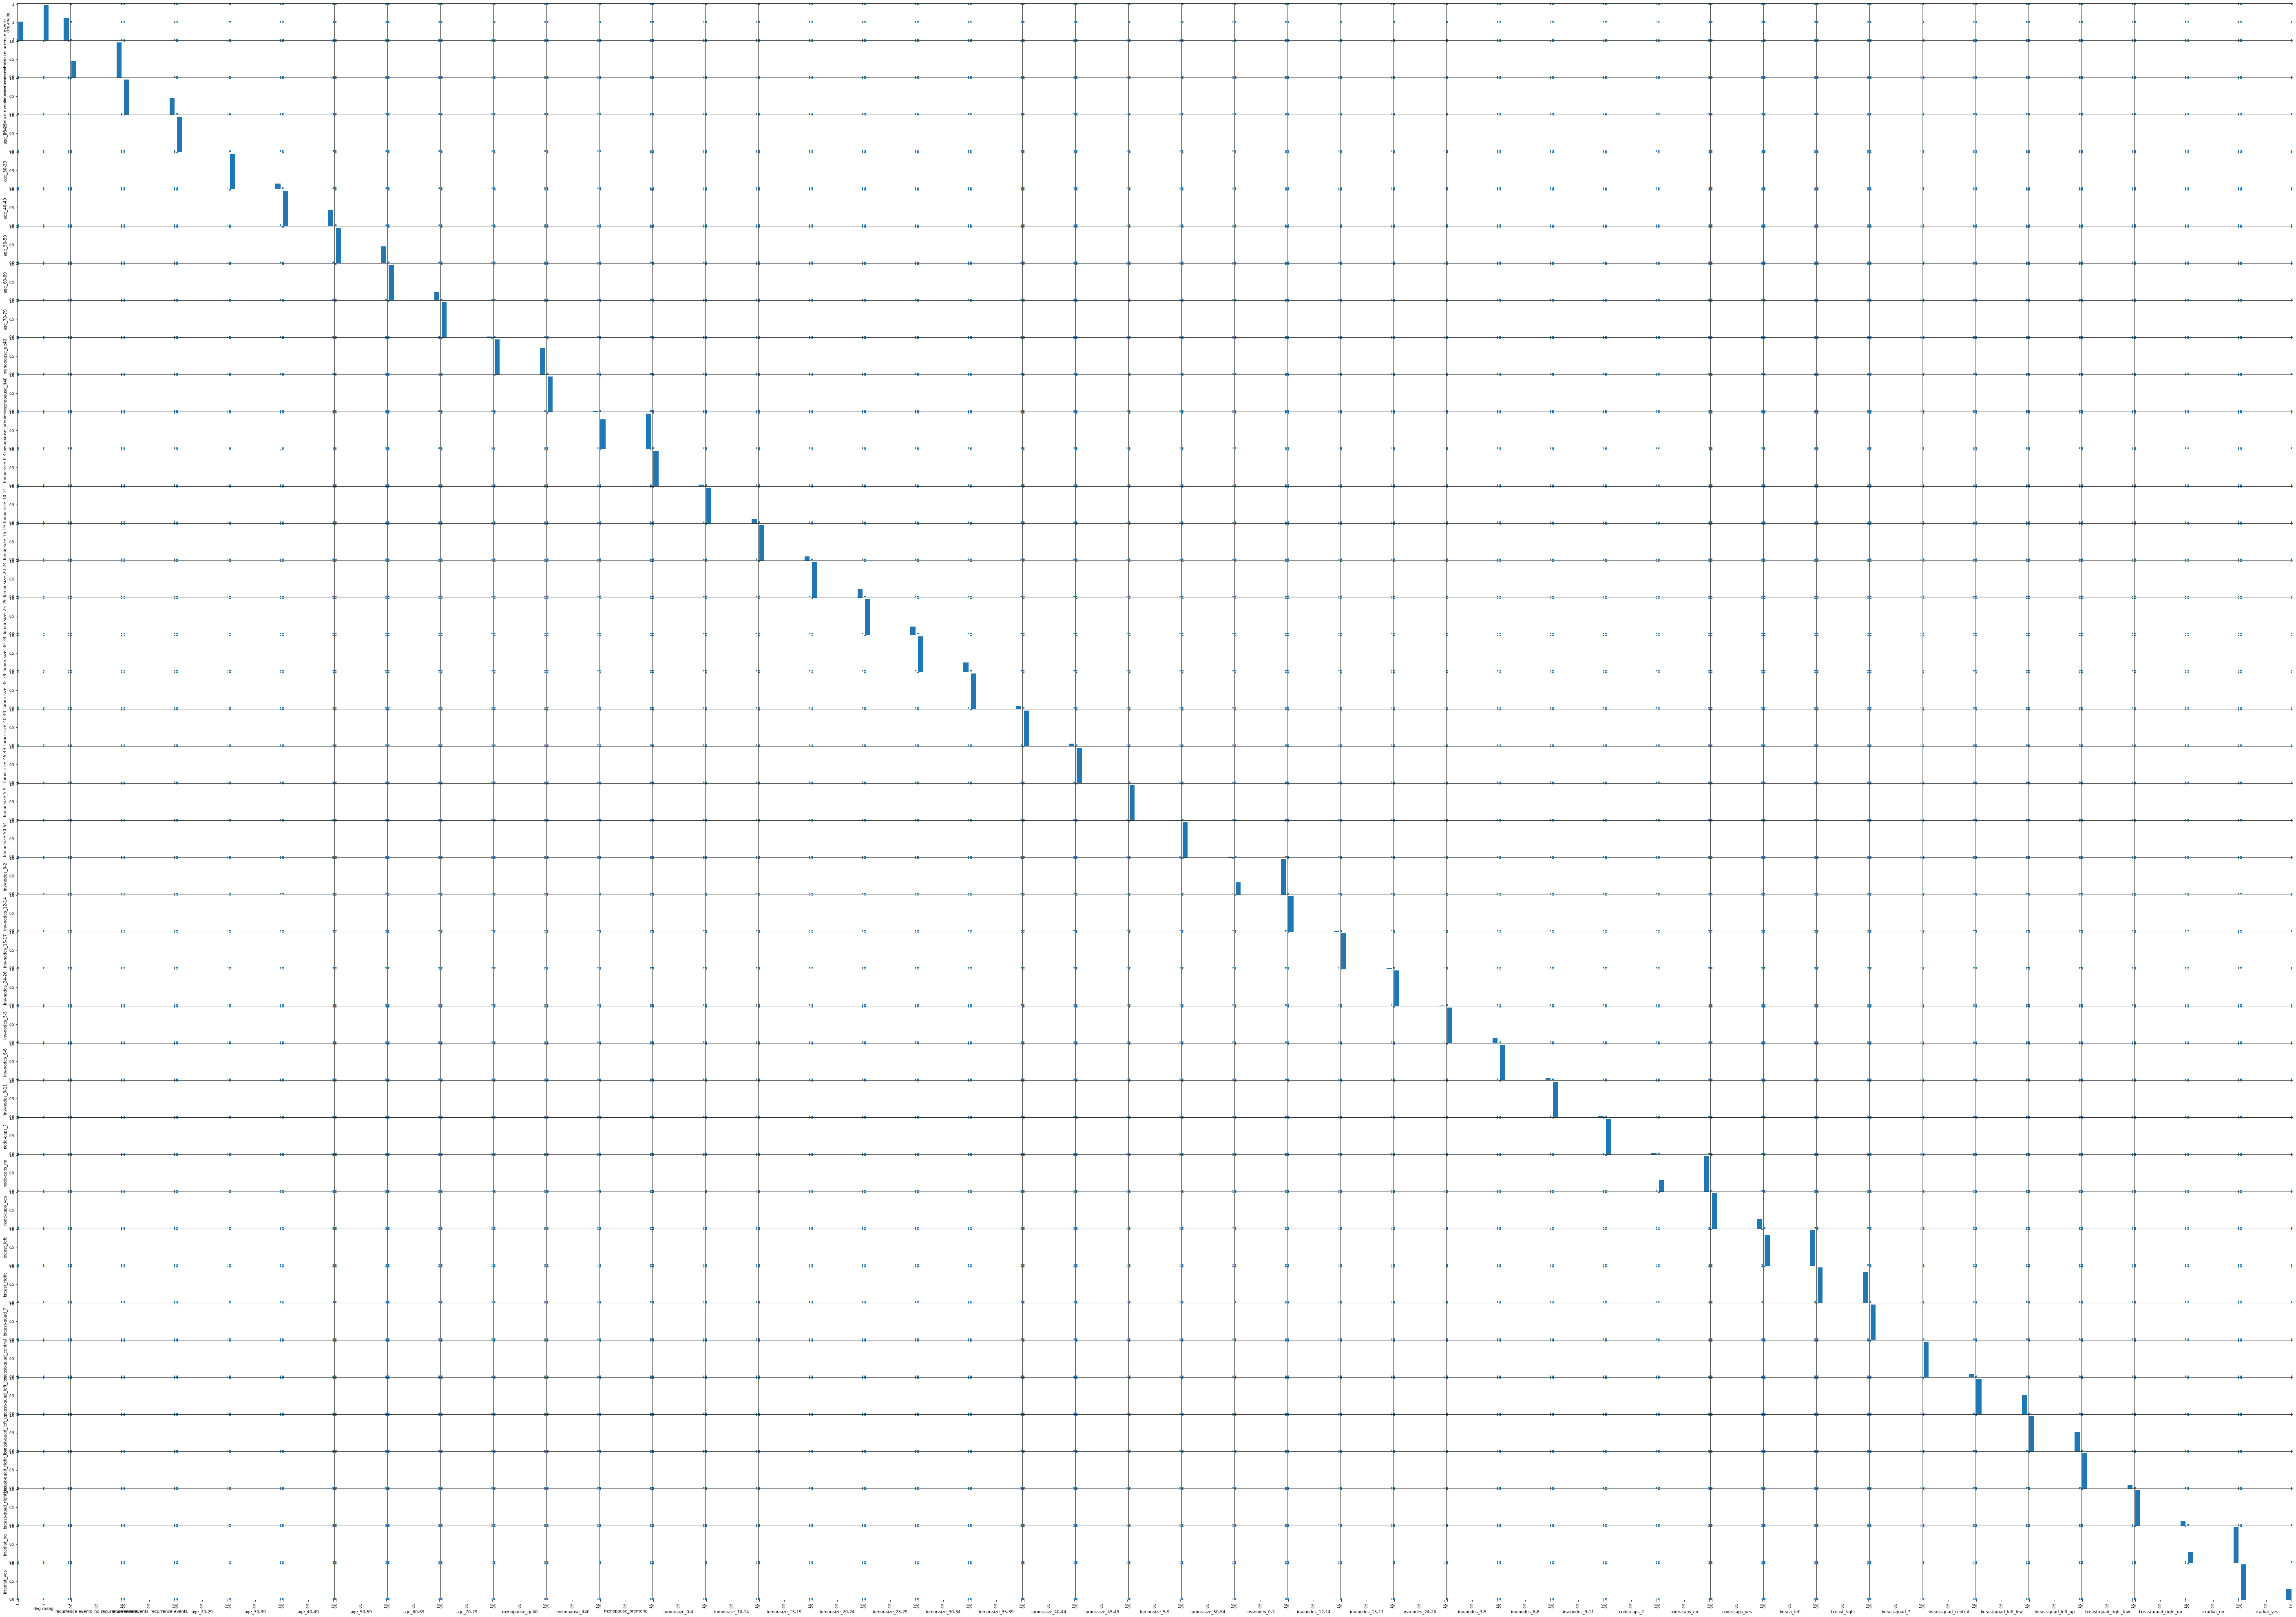

In [183]:
# Scatterplots
_ = pd.plotting.scatter_matrix(Cleaned_trained_data,figsize=(100, 72))

* The above histograms of all the features in this dataset describes each attributes w.r.t all other attributes by which we can see clearly that which of these features are correlated in each other but after column transformation using encoders we have maximum features of descrete data. 

In [182]:
# Correlations
correlations = Cleaned_trained_data.corr()  # this is a dataframe
# let's see how much each attribute correlates with the outcome 'Y'
correlations['recurrence-events_recurrence-events'].sort_values(ascending=False)

recurrence-events_recurrence-events       1.000000
node-caps_yes                             0.306905
deg-malig                                 0.290012
irradiat_yes                              0.198578
inv-nodes_3-5                             0.159848
inv-nodes_6-8                             0.158487
tumor-size_30-34                          0.143632
inv-nodes_9-11                            0.130954
breast-quad_?                             0.097697
inv-nodes_24-26                           0.097697
tumor-size_50-54                          0.091554
breast-quad_right_up                      0.090784
age_30-39                                 0.088383
inv-nodes_12-14                           0.087163
tumor-size_25-29                          0.066615
menopause_premeno                         0.053842
inv-nodes_15-17                           0.052957
tumor-size_45-49                          0.037280
breast_left                               0.027879
age_60-69                      

In the above correlations analysis i just analyzed that which attributes is how much correlated but we know that it is just representing the linear relationship while in this dataset we have descrete feauters many of them, for further analysis i will us K-Mean method to process the above data for, Moreover in this figure i just represented "recurrence-events_recurrence-events" correlations while i have checked all features iteratively by changing only the value in index.